In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from synchronization import plots
from synchronization import runner

# Proof that gamma rhythms are generated in our model by PING mechanism

TODO: add requirements by Börgers

We look at differenct scenarios here to verify the PING mechanism.

E.g. if we remove connection between E to I and I to E, then gamma rhythm would collapse as I requires E and vice versa.
If inhibitory neurons still fire in gamma frequency, we would have an ING mechanism instead where excitatory neurons are solely entrained by inhibitory population.

In [2]:
factor = 1

# overwriting default parameters
params = {

  "runtime": 1000.0,

  # synaptic coupling strengths, most important parameters for tuning PING mechanism
  "J_itoi": 1.5 * factor,
  "J_etoe": 0.4 * factor,
  "J_etoi": 0.4 * factor,
  "J_itoe": 2.0 * factor,

  "N_e": 1000,
  "N_i": 250,

  "ou_enabled": [False, False],

  # Independent spike trains generated by Poisson Point Process for each target neuron
  "poisson_enabled": [True, True],
  "poisson_variance": 10.0,
  "poisson_p": 0.875,
  "poisson_size": 800,
  "poisson_mean_input": 200,

  "J_ppee": 2.0,
  "J_ppei": 2.0,

   # if set to default of 0.1 this leads to strange split in frequency band
   "const_delay": 0.2,
   "N_pop": 2,

   "p_etoe": 0.1,
   "p_etoi": 0.4,
   "p_itoe": 0.1,
   "p_itoi": 0.4,
}

In [3]:
model = runner.run(modified_params=params, file_name="meng-replication")

Initializing net ...
Poisson rate for network 1:  5.0
Poisson rate for network 2:  5.0
Initialization time: 0.5669839382171631s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 8s


INFO       width adjusted from 10. ms to 10.05 ms [brian2.monitors.ratemonitor.adjusted_width]


==== Network Run Finished ====
runtime: 18.7


In [4]:
if 'model' not in locals() or model is None:
    model = analysis.load_model("meng-replication")

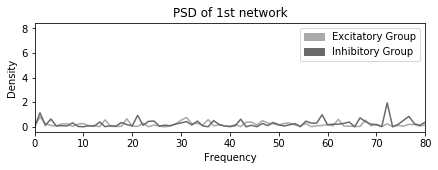

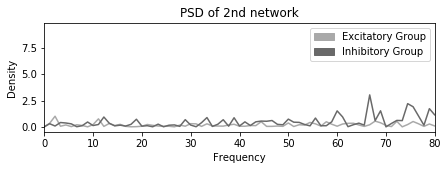

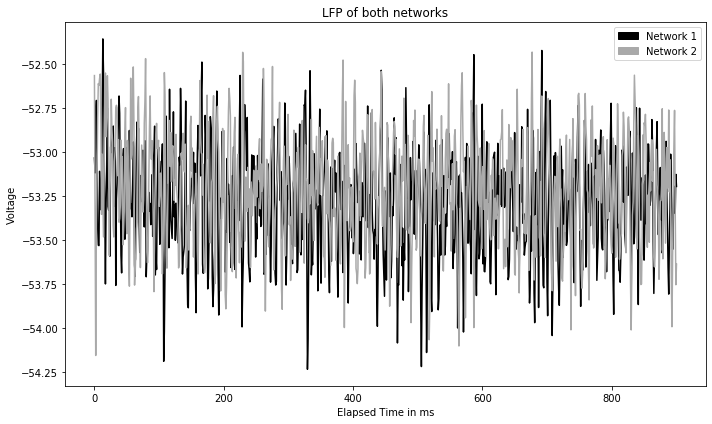

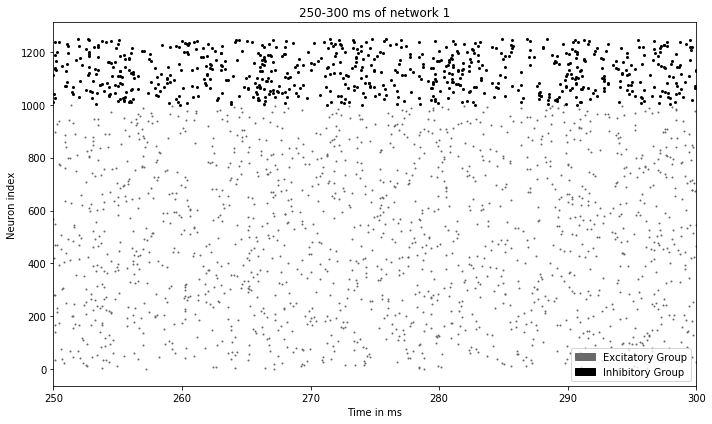

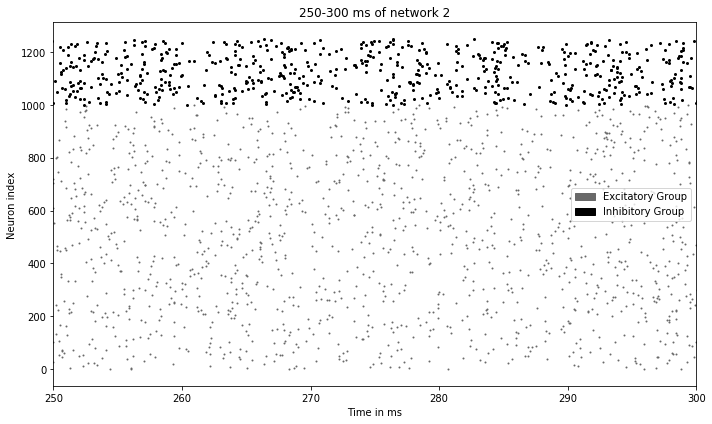

In [5]:
plots.plot_results(model)

# No Connectivity

Showing independent noise input.

In [6]:
params.update({
   "p_etoe": 0.0,
   "p_etoi": 0.0,
   "p_itoe": 0.0,
   "p_itoi": 0.0,
   "p_ppee": 0.0,
   "p_ppei": 0.0,
})
model = runner.run(modified_params=params, file_name="meng-replication")

Initializing net ...
Poisson rate for network 1:  5.0
Poisson rate for network 2:  5.0
Initialization time: 0.8328759670257568s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 8s
==== Network Run Finished ====
runtime: 11.7


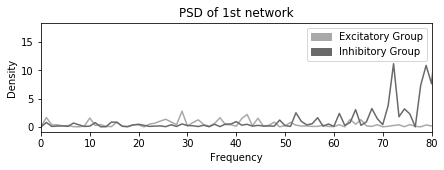

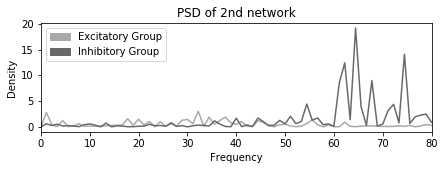

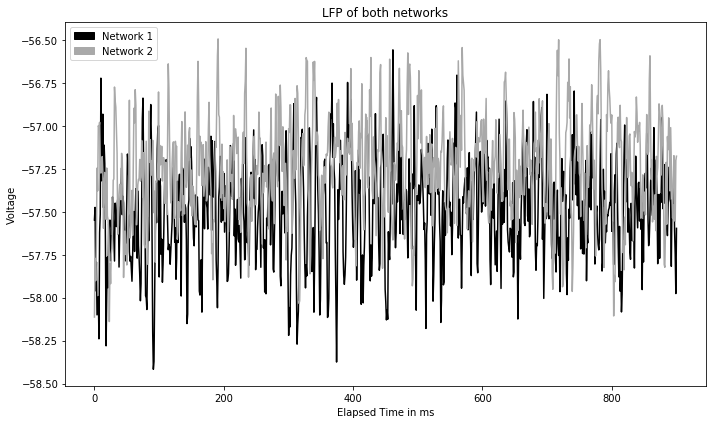

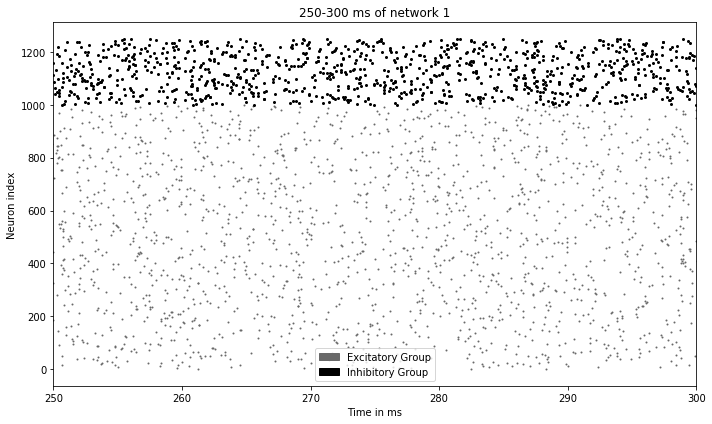

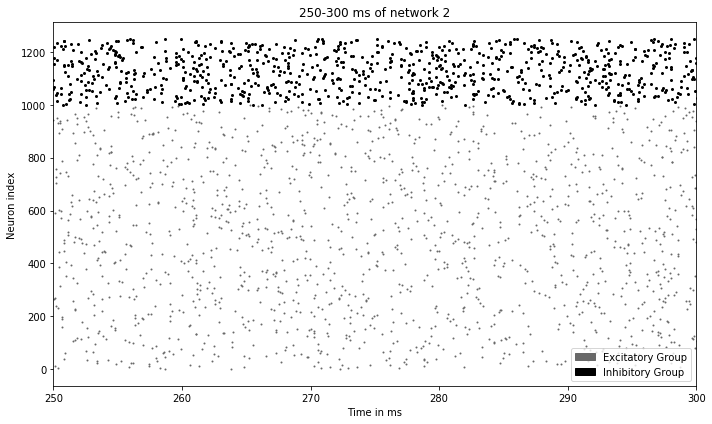

In [7]:
plots.plot_results(model)

# No Connectivity between E <-> I

In [8]:
params.update({
   "p_etoe": 0.4,
   "p_etoi": 0.0,
   "p_itoe": 0.0,
   "p_itoi": 0.4,
   "p_ppee": 0.01,
   "p_ppei": 0.0,
})
model = runner.run(modified_params=params, file_name="meng-replication")

Initializing net ...
Poisson rate for network 1:  5.0
Poisson rate for network 2:  5.0
Initialization time: 0.5674550533294678s
==== Running Network ... ====
Starting simulation at t=0. s for a duration of 1. s
1. s (100%) simulated in 8s
==== Network Run Finished ====
runtime: 12.7


WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/synchronization/plots.py:266: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
 [py.warnings]


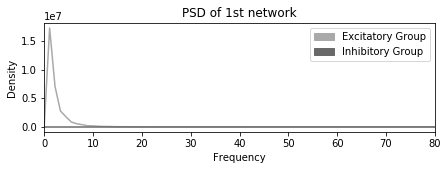

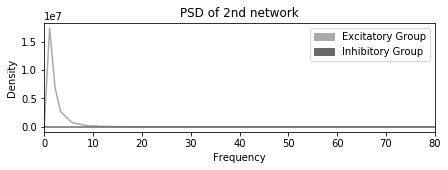

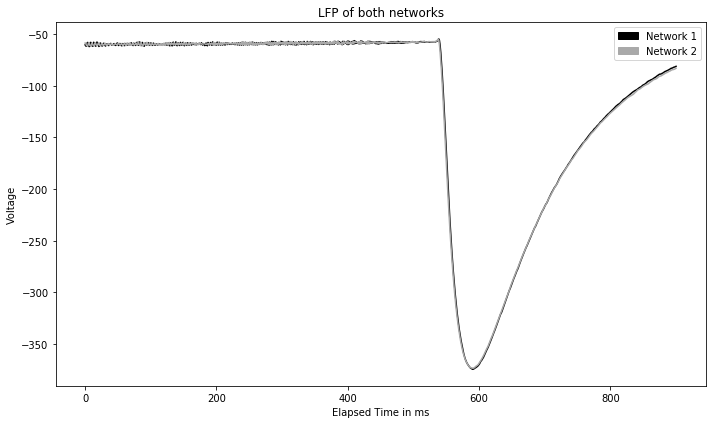

WARNING    /Users/lrebscher/git/Synchronization-by-Uncorrelated-Noise/venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


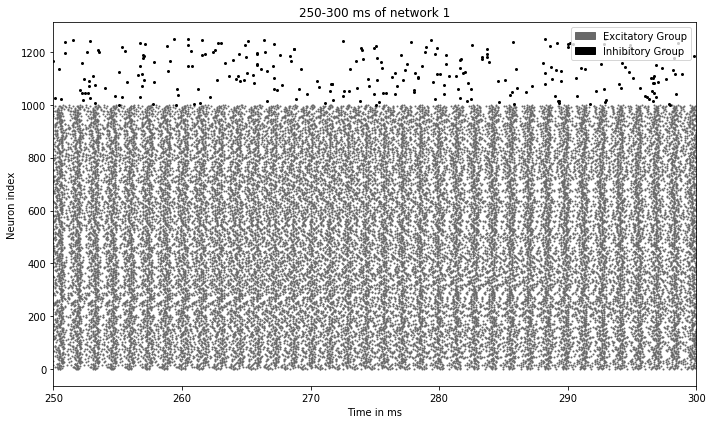

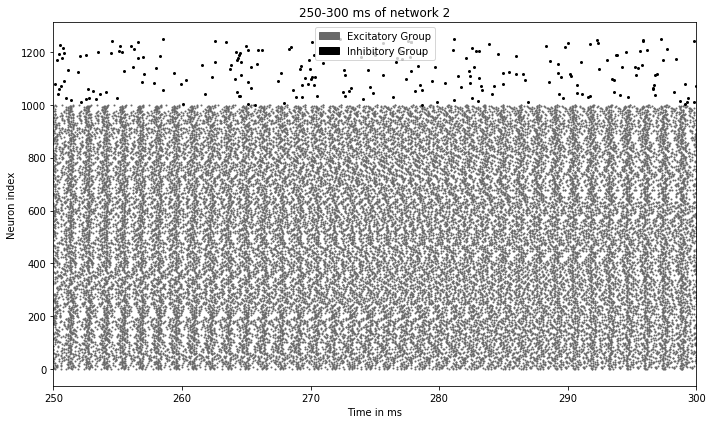

In [9]:
plots.plot_results(model)